# Overview
This project is aimed at scraping and analyzing the reviews from Rotten Tomatoes website for movie "Eternals". 

The first main part of this project includes data aquisition through webscraping technique and data cleaning/wrangling process. The website of Rotten Tomatoes is javascript-rendered. Thus, the Python package Selenium is used for webscraping. 

The second part of this project is focusing on sentiment analysis on audiences' reviews. It is conducted through Vader sentiment algorithem provided by natural langaue toolkit package in python,NLTK. 


# I. Data aquisition + Data cleaning

### 1. Data aquisition- Web Scraping

In [18]:
# import needed python packages 
# !pip install selenium
import selenium 
from selenium import webdriver
import os
import pandas as pd
import time
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist, word_tokenize
import re
%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', -1)

<ipython-input-18-8615fdc5645e>:18: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
# to build Chrome webdriver to automatically browser webpages from rotten tomatoes's website and parse the web elements
driver = webdriver.Chrome(executable_path=r'/Users/stephanie/Downloads/chromedriver')
driver.set_page_load_timeout(30)
driver.get("https://www.rottentomatoes.com/m/eternals/reviews?type=verified_audience&intcmp=rt-scorecard_audience-score-reviews")

# to create an empty list for storing the scraped data
data = []

# to scrape users and their reviews for this movie from the 1st page all the way to the 199th page and store scrapped data into the list "data"
for i in range (1,200):
    reviews = driver.find_elements_by_xpath("//ul[@class='audience-reviews']/li")
    for review in reviews:
        user_name=review.find_element_by_xpath("div/div/span[@class='audience-reviews__name']").text
        user_review=review.find_element_by_xpath("div[2]/p[1]").text
        data.append([user_name,user_review])

    try:
        # click "next" button to the next page
        driver.find_element_by_xpath("//nav[@class='prev-next-paging__wrapper']/button[@class='js-prev-next-paging-next btn prev-next-paging__button prev-next-paging__button-right']").click()
        time.sleep(10)


    except e:
        print(e)
        break
        
# close the web driver when the work is completed   
driver.close()


### 2. Data Cleaning -Text processing 

In [3]:
# split scraped data into 2 lists: a list of just movie review called data_review and a list of user's name called "data_user"
data_review= [i[1] for i in data]
print (data_review)
data_user=[i[0]for i in data]
print (data_user)    

["Story dragged, and the cast wasn't believable in too many roles. I was especially disappointed in Angelina.", 'It sucked! Way too drawn out. Eternals seemed like the length of the movie!', 'Movie was drawn out, Not as much action as the trailer made it seem. Kept going from pst to present and it got a little confusing. Just not as good as I thought it would be. Son loves Marvel movies and he said it was Meh!.', "Excellent Marvel cinematography! However because there are so many characters to introduce in a short amount of time, you aren't able to properly build attachments to the characters the way by the time the movies climax would expect you to.", 'Most people in the comments are confused and unsatisfied because their ignorance serves them well.', 'Was great, dont understand the hate for it at all. Film introduces whats basically a whole separate universe into the current Marvel canon, and does it fairly well. The action was pretty great, as was the overall story. I havent enjoyed

In [4]:
#create a funcation called "cleanedreview" to clean up the movie reviews which removes unneccesary characters and meaningless stopwords in English
def cleanedreview(reviews):
    clean_reviews=[]
    for review in reviews:
        print(review)
        # convert each item in the list to string in lowercase. Remove unneccesary characters such as ?!"" and only keep alphanumeric characters
        review = re.sub("[@#$%^&*()]", " ", review.lower())
        # remove useless stopwords    
        All_stoplist = set(stopwords.words('english'))
        review = [word for word in review.split() if word not in All_stoplist and len(word) > 2]
        clean_reviews.append( " ".join(review))
    return clean_reviews

In [5]:
# pass movie reviews into this function to obtain cleaned reviews
clean_reviews=cleanedreview(data_review)

Story dragged, and the cast wasn't believable in too many roles. I was especially disappointed in Angelina.
It sucked! Way too drawn out. Eternals seemed like the length of the movie!
Movie was drawn out, Not as much action as the trailer made it seem. Kept going from pst to present and it got a little confusing. Just not as good as I thought it would be. Son loves Marvel movies and he said it was Meh!.
Excellent Marvel cinematography! However because there are so many characters to introduce in a short amount of time, you aren't able to properly build attachments to the characters the way by the time the movies climax would expect you to.
Most people in the comments are confused and unsatisfied because their ignorance serves them well.
Was great, dont understand the hate for it at all. Film introduces whats basically a whole separate universe into the current Marvel canon, and does it fairly well. The action was pretty great, as was the overall story. I havent enjoyed Marvel films rec

In [6]:
# consolidate the data_user list and cleaned data_review list into a disctionary called data_cleaned with key "User" and value "Review" pairs
data_cleaned = {'User':data_user,'Review':clean_reviews}
print(data_cleaned)
# convert this disctionary into dataframe
df = pd.DataFrame(data_cleaned)
# save the cleaned data into a csv file 
df.to_csv('rotten_movie_review.csv')
# display summary info of this dataframe 
df.info()

{'User': ['Adrienne', 'John B', 'Walls Family', 'Yousef H', 'scythe', 'Ben', 'Stephanie', 'DAMMIT360', 'MikeE A', 'mm', 'J. Berman', 'Vincent', 'Bryce', 'Joseph', 'Richard', 'PJ Link', 'DeezNutz', 'Von', 'anonymous', 'william c', 'C from ATX', 'Gerald L', 'JJ R', 'dennis', 'S&Smom', 'David B', 'Eddie', 'kobie', 'Lara', 'The Chosen Juan', 'ChAndy', 'Chrissy', 'Anthony S', 'Jon H.', 'Erick', 'a', 'Mackenzie A', 'JGP1s', 'Charlotte', 'Jason', 'Amado H', 'Alfonso C.', 'Darae S', 'Levi', 'Sonam B', 'Randy M', 'Mark', 'KopperHed', 'Gadiel', 'Graceson F', 'Andrew', 'Jamie', 'Lwin', 'ANDREW E', 'Andy', 'Facebook U', 'Trevor H', 'Teresa', 'John M', 'Maria Isabel', 'Jonathan V', 'Paul C', 'Tony', 'Jimmy', 'Roger J', 'kerryann', 'paul s', 'Andre M', 'Michael W', 'Ron C', 'Richard R', 'ned', 'John L D', 'Jon', 'Carmen', 'Russell F', 'Dolores Juarez', 'Frances H', 'Juliette', '08Nole', 'Connie', 'JL', 'Gregory S', 'Kevin', 'Jason A', 'Donna', 'Dennis L.', 'Larry', 'Jedidiah', 'Kumar', 'D Racine', '

In [7]:
# print the first 10 rows of this dataframe
df.head(10)

,User,Review
0,Adrienne,"story dragged, cast believable many roles. especially disappointed angelina."
1,John B,sucked! way drawn out. eternals seemed like length movie!
2,Walls Family,"movie drawn out, much action trailer made seem. kept going pst present got little confusing. good thought would be. son loves marvel movies said meh!."
3,Yousef H,"excellent marvel cinematography! however many characters introduce short amount time, able properly build attachments characters way time movies climax would expect to."
4,scythe,people comments confused unsatisfied ignorance serves well.
5,Ben,"great, dont understand hate all. film introduces whats basically whole separate universe current marvel canon, fairly well. action pretty great, overall story. havent enjoyed marvel films recently quality severely dropped ever since release infinity war. film, however, stands manages quite lot runtime."
6,Stephanie,"honestly hype thought would love love avenger series marvel movies. however, many characters really get know feel connection them. me, movie lacks emotional connection."
7,DAMMIT360,maybe shouldve committed like part part
8,MikeE A,shit. boring horrible story. bored explain more. watch this. dumb.
9,mm,excellent. dont forget two post credits end


# II. Data Analysis

### 1. Vader Sentiment analysis

In [8]:
# convert the csv file with review data into a new dataframe called "df_1" for further analysis
df_1=pd.read_csv('rotten_movie_review.csv')

In [9]:
# display the 1st 5 rows of this new dataframe to ensure data looks good
df_1.head()

,Unnamed: 0,User,Review
0,0,Adrienne,"story dragged, cast believable many roles. especially disappointed angelina."
1,1,John B,sucked! way drawn out. eternals seemed like length movie!
2,2,Walls Family,"movie drawn out, much action trailer made seem. kept going pst present got little confusing. good thought would be. son loves marvel movies said meh!."
3,3,Yousef H,"excellent marvel cinematography! however many characters introduce short amount time, able properly build attachments characters way time movies climax would expect to."
4,4,scythe,people comments confused unsatisfied ignorance serves well.


In [10]:
# instantiate a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()
# The polarity_scores method of SentimentIntensityAnalyzer object returns a sentiment dictionary,which contains pos, neg, neu, and compound scores.
# The compound score is computed by normalizing the sum of positive,negative, and neutral scores 
# and will be shown in normalized format whcih between -1(most negative) and 1 (most positive).
# Then store these ratings into different columns in df dataframe
df_1['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df_1['Review']]
df_1['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df_1['Review']]
df_1['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df_1['Review']]
df_1['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df_1['Review']]
# Create a new column to mark if the review is negative or positive based on resulted compound score.
# if compound score is >=0, then mark the review as "pos", else "neg"
df_1['Rating'] = df_1['compound'].apply(lambda x: 'pos'if x>=0 else 'neg')




In [11]:
# to display the 1st 15 rows of this dataframe 
df_1.head(15)

,Unnamed: 0,User,Review,compound,neg,neu,pos,Rating
0,0,Adrienne,"story dragged, cast believable many roles. especially disappointed angelina.",-0.5563,0.396,0.604,0.000,neg
1,1,John B,sucked! way drawn out. eternals seemed like length movie!,-0.2695,0.274,0.535,0.191,neg
2,2,Walls Family,"movie drawn out, much action trailer made seem. kept going pst present got little confusing. good thought would be. son loves marvel movies said meh!.",0.8319,0.050,0.656,0.294,pos
3,3,Yousef H,"excellent marvel cinematography! however many characters introduce short amount time, able properly build attachments characters way time movies climax would expect to.",0.8356,0.000,0.681,0.319,pos
4,4,scythe,people comments confused unsatisfied ignorance serves well.,-0.6597,0.595,0.238,0.167,neg
5,5,Ben,"great, dont understand hate all. film introduces whats basically whole separate universe current marvel canon, fairly well. action pretty great, overall story. havent enjoyed marvel films recently quality severely dropped ever since release infinity war. film, however, stands manages quite lot runtime.",0.9099,0.151,0.502,0.347,pos
6,6,Stephanie,"honestly hype thought would love love avenger series marvel movies. however, many characters really get know feel connection them. me, movie lacks emotional connection.",0.9413,0.000,0.546,0.454,pos
7,7,DAMMIT360,maybe shouldve committed like part part,0.5574,0.000,0.465,0.535,pos
8,8,MikeE A,shit. boring horrible story. bored explain more. watch this. dumb.,-0.9403,0.759,0.241,0.000,neg
9,9,mm,excellent. dont forget two post credits end,0.7824,0.000,0.337,0.663,pos


In [12]:
# to show the top 5 postive reviews 
df_1.sort_values('compound', ascending=False).head(5)


,Unnamed: 0,User,Review,compound,neg,neu,pos,Rating
1699,1699,dre' S.,"loved homage jack ""the king"" kirby creation 70's. see characters, last house ideas screen applied spin looking morality ikaris along unlikely deaths ajak gilgamesh took back mythology taught jack stan. appreciated chloe took account jack's lineage along neils updates others. movie made remember respect jack even shared take view mythology viewed tales heroes/villains, struggle overcome adversity balance life's joys/life's pains overall question mortality searching immortality. eternals, opinion, jacks spin olympians. displayed love greek/roman tales absconded images accounts create something familiar, yet new. new villains accompany new vigor conflict young comic book audience. first meeting ikaris left thinking perfect hero. perfect character, yet perfectly planned hero. courageous, selfless, powerful numerous abilities, impervious battle along immortal also humble. leader, boss. thena boss default brashness goes daughter zuras shadow athena. ikaris intention, icon eternal family. honest, never really compared identified superman, movie. never viewed superman perfect hero. similar qualities ikaris, often seemed aloof me. really attached human condition beyond observer pitying savior, still alien. ikaris immortal family shared common root/beginning soul humanity. yes, family homo immortus, found along root human tree. jack made earthling, beginnings. jacks lineage explaination eternals, offshoots human family tie marvel saga together. marvel amalgamation families, atlantian, mutant, asgardian, olympian, kree, skull, shi'ar, inhuman, super-human homo sapien. tells story also adds another piece puzzle orchestrated masterpiece first spelled-out drawn. foundation.",0.9956,0.068,0.653,0.278,pos
1696,1696,Ralph H,"okay, i'm marvel fan. movie origin story going turn huge plot line going forward. yes, questions choices, overall amazing, acting better marvel movies, characters easy love, plot twists plenty, end credits exciting. sounds like great marvel movie me! loved it. critics tear apart fans going enjoy it. goal. make something enjoy watching.",0.9940,0.025,0.369,0.607,pos
85,85,Donna,"fantastic! loved everything it! surprisingly funny! excellent storyline, fantastic action scenes, beautiful costumes, special effects, easy follow, characters well done! got thinking! loved laser action especially liked linked entire movie real historical artifacts end credits section!",0.9913,0.000,0.353,0.647,pos
10,10,J. Berman,"i'm biggest marvel fan, movie took cake. one best movies seen recent years, music compelling beautiful. everything worked well tell story, all-star cast stole show. people movie critics reviewed back forth time events confused them, people can't balance damn checkbook, nothing makes happy! movie fantastic, gemma chan richard manning even pulled tears marine's eyes ""emergence"" scene, fantastic! give movie total 10+. seen alone, friends total times now. that's marvel fans do, right? can't wait see second one future date....go see understand fast action packed film, one humanity love. underwritten humor characters spot on, especially phastos kingo! great work. enjoy movie years come. thank experience.",0.9902,0.079,0.576,0.345,pos
1180,1180,mike m,"3rd time seeing movie gets better every time watch it. loved marvel took risk movie completely paid different yes, still marvel movie yes, it’s popcorn kinda movie stunning special effects awesome set designs,great character chemistry,great story, amazing score. don’t understand people don’t like movie makes sense people don’t like movie say people wake realize it’s different story risk taker something marvel wanted introducing brand new team superhero’s. give movie 100 extremely highly recommend movie.",0.9888,0.040,0.557,0.402,pos


In [14]:
# to show the top 5 negative reviews 
df_1.sort_values('compound', ascending=True).head(5)

,Unnamed: 0,User,Review,compound,neg,neu,pos,Rating
1598,1598,JDF,left movie halfway through. androgynous homo-sexual deities—socialist bs. also presented allied end war fascists tragic. conventional ground warfare carpet bombing killed multitudes a-bombs did. bad guys—who started war? ignorance hollywood astounding.,-0.9702,0.505,0.439,0.056,neg
98,98,luis,worst marvel movie date. many plot holes lot movie doesn’t make sense. lot feels forced. boring. really disappointed sad really sad,-0.9497,0.538,0.385,0.077,neg
8,8,MikeE A,shit. boring horrible story. bored explain more. watch this. dumb.,-0.9403,0.759,0.241,0.000,neg
1527,1527,Fernando U,"disappointed movie. potential wasted. horrible character development, horrible accents, flat jokes poor storytelling. can’t believe green lighted is.",-0.9371,0.539,0.395,0.066,neg
297,297,Adam,bad. bad writing bad lines. forced acting. chemistry among characters.,-0.9260,0.692,0.308,0.000,neg


In [15]:
# to show descriptive statistics for the all numeric ratings 
df_1.describe()

,Unnamed: 0,compound,neg,neu,pos
count,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000
mean,994.500000,0.495589,0.088647,0.515641,0.395721
std,574.607837,0.465250,0.147242,0.203528,0.227262
min,0.000000,-0.970200,0.000000,0.000000,0.000000
25%,497.250000,0.273200,0.000000,0.378000,0.250250
50%,994.500000,0.659700,0.000000,0.506000,0.398000
75%,1491.750000,0.848400,0.142000,0.632000,0.559000
max,1989.000000,0.995600,0.844000,1.000000,1.000000


Text(0.5, 0, 'Compound score')

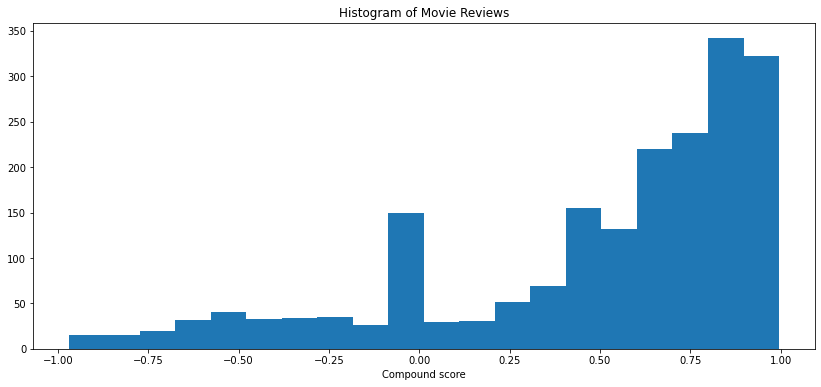

In [19]:
# to plot the compound ratings in histagrams
plt.figure(figsize=(14,6))
plt.hist(df_1['compound'], bins=20)
plt.title('Histogram of Movie Reviews')
plt.xlabel('Compound score')

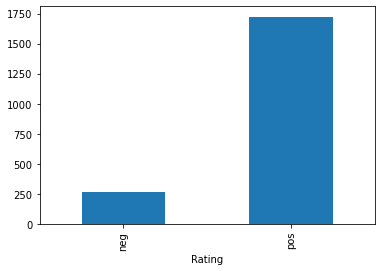

In [20]:
# to group data by "Rating" column and show the size in bar chart
df_1.groupby('Rating').size().plot.bar()

In [21]:
# import python package for wordcloud
from wordcloud import WordCloud

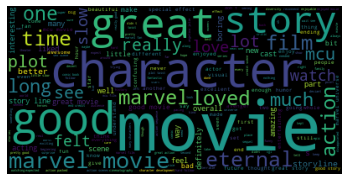

In [22]:
# create wordcloud to show words that are frequently used in the reviews
wordcloud = WordCloud().generate(' '.join(df_1['Review']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()